# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете (fachion_mnist, mdb_reviews, boston_housing). Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br>
    </li>
    <li>Постройте сеть на Dense слоях с использование нескольких нитей графа вычислений. (concatenate, Add, ....)<br></li>        
    <li>*Поработайте с документацией TensorFlow 2. Найдите полезные команды не разобранные на уроке.
    </li>  
</ol>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [0]:
### Загрузка данных boston_housing
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [0]:
### Признаковое пространство
print(x_train[1])

[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]


In [0]:
### Целевая переменная - вещественное число (задача регрессии)
print(y_train[1])

42.3


In [0]:
### Масштабируем данные (стандартизация)
means = x_train.mean(axis=0)
stds = x_train.std(axis=0)

x_train_scaled = (x_train - means) / stds
x_test_scaled = (x_test - means) / stds

In [0]:
### Количество входных признаков - 13
x_train_scaled.shape

(404, 13)

Для решения задачи обучим две нейросети с одним скрытым полносвязным слоем и одним выходным (поскольку задача регрессии). Одна сеть содержит в скрытом слое 64 нейрона, вторая - 128. В качестве метрики выберем MAPE (Mean Absolute Percentage Error).

Сети обучаются и проверяются на *шкалированных* данных.

In [0]:
### Сеть с 64 нейронами
model_64 = keras.models.Sequential()
model_64.add(keras.layers.Dense(64, activation='relu', input_shape=(13, ), name='hidden_64'))
model_64.add(keras.layers.Dense(1, name='output_64'))
model_64.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [0]:
history_64 = model_64.fit(x_train_scaled,
                          y_train,
                          epochs=100,
                          batch_size=1,
                          validation_split=0.33,
                          verbose=1)

Train on 270 samples, validate on 134 samples
Epoch 1/100
270/270 [==============================] - 3s 10ms/sample - loss: 465.0877 - mean_absolute_percentage_error: 89.1374 - val_loss: 402.7943 - val_mean_absolute_percentage_error: 71.2311
Epoch 2/100
270/270 [==============================] - 1s 4ms/sample - loss: 185.8883 - mean_absolute_percentage_error: 49.6423 - val_loss: 138.1135 - val_mean_absolute_percentage_error: 34.6801
Epoch 3/100
270/270 [==============================] - 1s 4ms/sample - loss: 55.2661 - mean_absolute_percentage_error: 25.1510 - val_loss: 78.9185 - val_mean_absolute_percentage_error: 26.5475
Epoch 4/100
270/270 [==============================] - 1s 4ms/sample - loss: 33.0974 - mean_absolute_percentage_error: 20.2058 - val_loss: 59.2934 - val_mean_absolute_percentage_error: 22.4936
Epoch 5/100
270/270 [==============================] - 1s 4ms/sample - loss: 25.9860 - mean_absolute_percentage_error: 17.5206 - val_loss: 49.0393 - val_mean_absolute_percentage

In [0]:
### Сеть с 128 нейронами
model_128 = keras.models.Sequential()
model_128.add(keras.layers.Dense(128, activation='relu', input_shape=(13, ), name='hidden_128'))
model_128.add(keras.layers.Dense(1, name='output_128'))
model_128.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [0]:
history_128 = model_128.fit(x_train_scaled,
                            y_train,
                            epochs=100,
                            batch_size=1,
                            validation_split=0.33,
                            verbose=1)

Train on 270 samples, validate on 134 samples
Epoch 1/100
270/270 [==============================] - 1s 4ms/sample - loss: 353.8360 - mean_absolute_percentage_error: 75.3809 - val_loss: 199.7231 - val_mean_absolute_percentage_error: 44.7112
Epoch 2/100
270/270 [==============================] - 1s 4ms/sample - loss: 65.4693 - mean_absolute_percentage_error: 27.7261 - val_loss: 71.6796 - val_mean_absolute_percentage_error: 25.0649
Epoch 3/100
270/270 [==============================] - 1s 4ms/sample - loss: 30.0546 - mean_absolute_percentage_error: 19.4061 - val_loss: 51.5983 - val_mean_absolute_percentage_error: 20.1988
Epoch 4/100
270/270 [==============================] - 1s 4ms/sample - loss: 23.5145 - mean_absolute_percentage_error: 17.2052 - val_loss: 42.7430 - val_mean_absolute_percentage_error: 18.0598
Epoch 5/100
270/270 [==============================] - 1s 4ms/sample - loss: 20.5562 - mean_absolute_percentage_error: 16.0836 - val_loss: 37.3256 - val_mean_absolute_percentage_er

Проверим качество моделей:

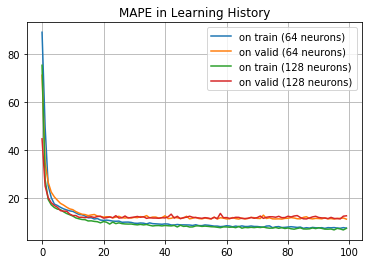

In [0]:
plt.plot(history_64.history['mean_absolute_percentage_error'], label='on train (64 neurons)')
plt.plot(history_64.history['val_mean_absolute_percentage_error'], label='on valid (64 neurons)')
plt.plot(history_128.history['mean_absolute_percentage_error'], label='on train (128 neurons)')
plt.plot(history_128.history['val_mean_absolute_percentage_error'], label='on valid (128 neurons)')
plt.title('MAPE in Learning History')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [0]:
print('64 neurons in the hidden layer')
train_loss, train_mape = model_64.evaluate(x_train_scaled, y_train, verbose=0)
test_loss, test_mape = model_64.evaluate(x_test_scaled, y_test, verbose=0)
print(f' train_loss: {train_loss:.3f}, train_mape: {train_mape:.2f}%')
print(f' test_loss: {test_loss:.3f}, test_mape: {test_mape:.2f}%')

print('\n128 neurons in the hidden layer')
train_loss, train_mape = model_128.evaluate(x_train_scaled, y_train, verbose=0)
test_loss, test_mape = model_128.evaluate(x_test_scaled, y_test, verbose=0)
print(f' train_loss: {train_loss:.3f}, train_mape: {train_mape:.2f}%')
print(f' test_loss: {test_loss:.3f}, test_mape: {test_mape:.2f}%')

64 neurons in the hidden layer
 train_loss: 6.777, train_mape: 8.33%
 test_loss: 20.836, test_mape: 13.67%

128 neurons in the hidden layer
 train_loss: 6.763, train_mape: 9.24%
 test_loss: 20.620, test_mape: 15.17%


Сохраним веса обученных моделей:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model_64.save_weights('/content/drive/My Drive/model_64.h5')
model_128.save_weights('/content/drive/My Drive/model_128.h5')

Синтезируем общую сеть, которая бы обучалась и работала на *нешкалированных* исходных данных..

In [0]:
### Стандартизация для лямбда-функции
def standard_scaling(x):
    return (x - means)/ stds

In [0]:
### 13 входов для входных признаков, которые стандартизирует лямбда-функция
inputs = keras.layers.Input(shape=(13,), name='input')
inputs_scaled = keras.layers.Lambda(standard_scaling, name='standard_scaling')(inputs)

In [0]:
# 64 нейрона скрытого слоя и 1 выходной
hiddens_64 = keras.layers.Dense(64, activation='relu', name='hidden_64')(inputs_scaled)
outputs_64 = keras.layers.Dense(1, activation='relu', name='output_64')(hiddens_64)
part_64 = keras.models.Model(inputs=inputs, outputs=outputs_64)

# 128 нейрона скрытого слоя и 1 выходной
hiddens_128 = keras.layers.Dense(128, activation='relu', name='hidden_128')(inputs_scaled)
outputs_128 = keras.layers.Dense(1, activation='relu', name='output_128')(hiddens_128)
part_128 = keras.models.Model(inputs=inputs, outputs=outputs_128)

In [0]:
### Загрузка сохраненных весов для соответствующих нейронов
part_64.load_weights('/content/drive/My Drive/model_64.h5')
part_128.load_weights('/content/drive/My Drive/model_128.h5')

In [0]:
### Усреднение выходов обеих сетей и объединение в общую сеть
outputs = keras.layers.Average(name='average')([part_64.output, part_128.output])
model_all = keras.models.Model(inputs=[inputs], outputs=outputs, name='model_all')

Структура общей сети, которая работает с нешкалированными исходными данными:

In [0]:
model_all.summary()

Model: "model_all"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 13)]         0                                            
__________________________________________________________________________________________________
standard_scaling (Lambda)       (None, 13)           0           input[0][0]                      
__________________________________________________________________________________________________
hidden_64 (Dense)               (None, 64)           896         standard_scaling[0][0]           
__________________________________________________________________________________________________
hidden_128 (Dense)              (None, 128)          1792        standard_scaling[0][0]           
__________________________________________________________________________________________

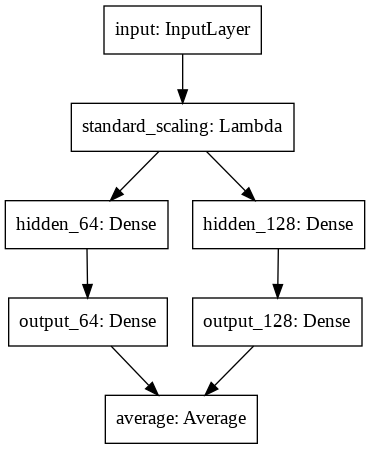

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model_all,to_file='/content/drive/My Drive/model_all.png')

In [0]:
model_all.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mape'])

Проверка общей сети (результат - действительно, среднее между результатами сетей):

In [0]:
test_loss, test_mape = model_all.evaluate(x_test, y_test, verbose=2)

102/102 - 0s - loss: 20.3656 - mean_absolute_percentage_error: 14.1936
